Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

DataFrame after cleaning and encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  D

<ipython-input-4-bdfd7ccb0164>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-bdfd7ccb0164>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Top 5 Influential Users by Degree Centrality:
User: 15723373.0, Degree Centrality: 0.3108
User: 15750335.0, Degree Centrality: 0.3108
User: 15773447.0, Degree Centrality: 0.3083
User: 15622171.0, Degree Centrality: 0.3083
User: 15736228.0, Degree Centrality: 0.3083

Top 5 Influential Users by Purchase Influence:
User: 15750447.0, Purchase Influence: 0.3033
User: 15637593.0, Purchase Influence: 0.3008
User: 15713912.0, Purchase Influence: 0.2982
User: 15594762.0, Purchase Influence: 0.2907
User: 15573926.0, Purchase Influence: 0.2857


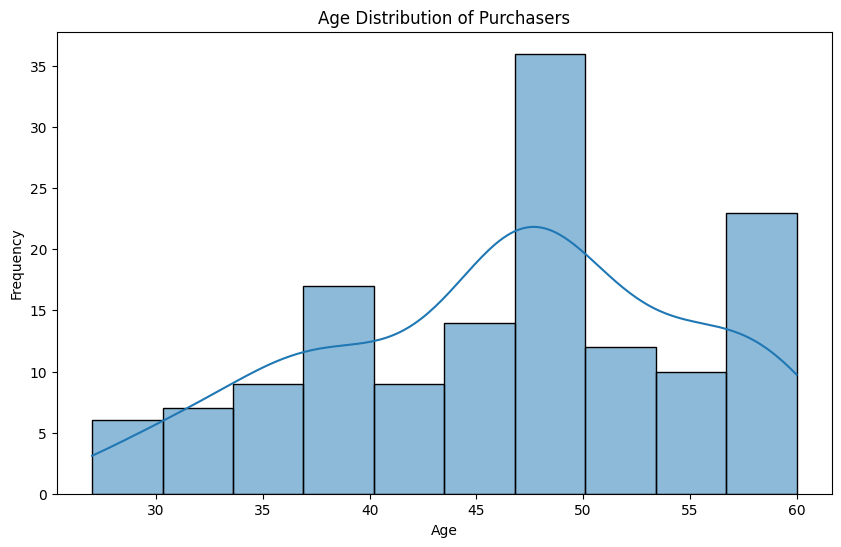

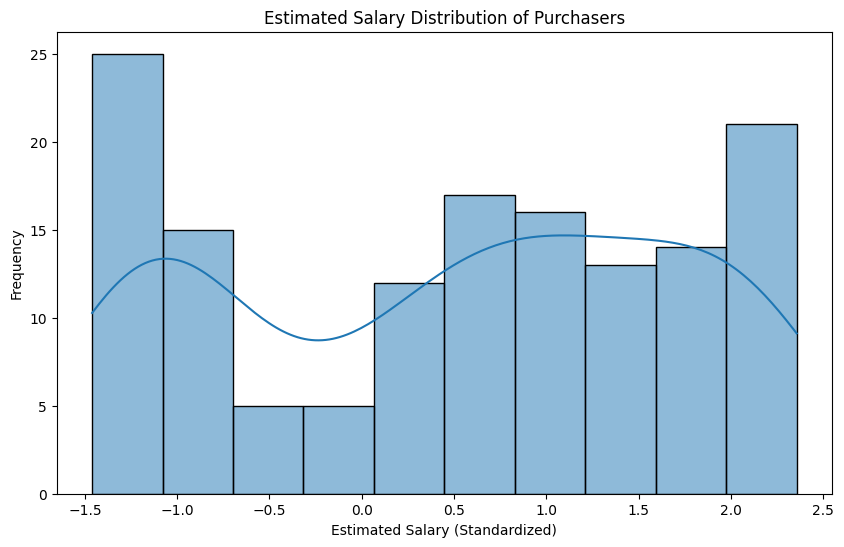

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/archive (1).zip")

print("Initial DataFrame Info:")
print(df.info())
print(df.head())

df['Age'].fillna(df['Age'].median(), inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].median(), inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

scaler = StandardScaler()
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])

print("\nDataFrame after cleaning and encoding:")
print(df.info())
print(df.head())

G = nx.Graph()

for _, row in df.iterrows():
    G.add_node(row['User ID'], age=row['Age'], gender=row['Gender'], salary=row['EstimatedSalary'], purchased=row['Purchased'])

for i, user1 in df.iterrows():
    for j, user2 in df.iterrows():
        if i != j:
            if abs(user1['Age'] - user2['Age']) <= 5 and abs(user1['EstimatedSalary'] - user2['EstimatedSalary']) <= 1:
                G.add_edge(user1['User ID'], user2['User ID'])

degree_centrality = nx.degree_centrality(G)

purchase_influence = {user: G.nodes[user]['purchased'] * degree_centrality[user] for user in G.nodes}

top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_purchase_influence = sorted(purchase_influence.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 Influential Users by Degree Centrality:")
for user, centrality in top_degree_centrality:
    print(f"User: {user}, Degree Centrality: {centrality:.4f}")

print("\nTop 5 Influential Users by Purchase Influence:")
for user, influence in top_purchase_influence:
    print(f"User: {user}, Purchase Influence: {influence:.4f}")

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Purchased'] == 1]['Age'], bins=10, kde=True)
plt.title('Age Distribution of Purchasers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Purchased'] == 1]['EstimatedSalary'], bins=10, kde=True)
plt.title('Estimated Salary Distribution of Purchasers')
plt.xlabel('Estimated Salary (Standardized)')
plt.ylabel('Frequency')
plt.show()
